In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/jj.csv')
df.tail(4)

,date,data
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [5]:
# we will try to forecast the last 4 quarters of data
train, test = df[:-4], df[-4:]

In [7]:
# we need to define an error metric to evaluate the performance of our forecast.
def calc_mape(predicted_value, true_value) -> float:
    """Calculate mean absolute percentage error"""
    error = (predicted_value - true_value) / true_value
    return np.mean(np.abs(error)) * 100
    

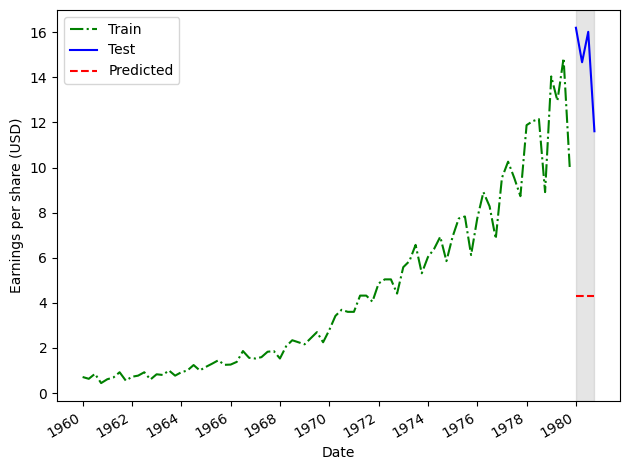

In [ ]:
historical_mean = np.ones(4) * np.mean(train['data'])
calc_mape(historical_mean, test['data'])

fig, ax = plt.subplots()
 
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], historical_mean, 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
 
fig.autofmt_xdate()
plt.tight_layout()

In [18]:
last_year_mean = np.mean(train.data[-4:])
calc_mape(last_year_mean, test['data'])

15.5963680725103

In [19]:
last = train.data.iloc[-1]
calc_mape(last, test['data'])

30.457277908606535

In [20]:
last_season = train['data'][-4:].values
calc_mape(last_season, test['data'].values)

11.561658552433654